In [1]:
from itertools import product

import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

from Nabatchikov_practice1_1 import CrossEntropyAgent
from Nabatchikov_practice1_3 import CrossEntropyAgent_V2

pd.set_option('display.max_rows', 500)

In [2]:
STATE_N = 500
ACTION_N = 6
iteration_n = 40
columns=["q_param", "trajectory_n", "iteration_n", "max_length", "mean_total_reward", "max_total_reward"]

# task1

In [3]:
task_1_df = []
results_1 = []

q_params = (0.9, 0.6, 0.4)
trajectory_n = (200, 400)
max_length = (500, 1000)
for q, t, length in tqdm(product(q_params, trajectory_n, max_length)):
    agent = CrossEntropyAgent(state_n=STATE_N, action_n=ACTION_N)
    result = agent.train(
    trajectory_n=t,
    iteration_n=iteration_n,
    max_length=length,
    q_param=q,
    laplace_smoothing=0.0,
    policy_smoothing=1,
    )
    results_1.append(result)
    task_1_df.append([q, t, iteration_n, length, result["info"][-1]["mean_total_reward"], result["info"][-1]["max_total_reward"]])


12it [01:55,  9.65s/it]


In [4]:
df = pd.DataFrame(task_1_df, columns=columns)

In [5]:
df

,q_param,trajectory_n,iteration_n,max_length,mean_total_reward,max_total_reward
0,0.9,200,40,500,-461.8500,14
1,0.9,200,40,1000,-306.1400,14
2,0.9,400,40,500,-203.3300,15
3,0.9,400,40,1000,-163.8275,15
4,0.6,200,40,500,-132.7000,15
5,0.6,200,40,1000,-129.9400,15
6,0.6,400,40,500,2.0875,15
7,0.6,400,40,1000,-2.1450,15
8,0.4,200,40,500,-42.6450,13
9,0.4,200,40,1000,-122.6150,9


In [6]:
best_params = df[df.max_total_reward == df.max_total_reward.max()]
best_params = best_params[best_params.mean_total_reward == best_params.mean_total_reward.max()]

best_params

,q_param,trajectory_n,iteration_n,max_length,mean_total_reward,max_total_reward
11,0.4,400,40,1000,6.6275,15


In [7]:
agent = CrossEntropyAgent(state_n=STATE_N, action_n=ACTION_N)
best_initital = agent.train(
    trajectory_n=400,
    iteration_n=40,
    max_length=1000,
    q_param=0.4,
    laplace_smoothing=0.0,
    policy_smoothing=1,
    debug=True
    )
best_initital

{'iteration:': 0, 'mean_total_reward': -771.4675, 'max_total_reward': -101}
{'iteration:': 1, 'mean_total_reward': -722.4475, 'max_total_reward': -81}
{'iteration:': 2, 'mean_total_reward': -671.145, 'max_total_reward': -101}
{'iteration:': 3, 'mean_total_reward': -626.705, 'max_total_reward': -15}
{'iteration:': 4, 'mean_total_reward': -553.4125, 'max_total_reward': -39}
{'iteration:': 5, 'mean_total_reward': -499.245, 'max_total_reward': -37}
{'iteration:': 6, 'mean_total_reward': -427.6575, 'max_total_reward': -13}
{'iteration:': 7, 'mean_total_reward': -360.4225, 'max_total_reward': -2}
{'iteration:': 8, 'mean_total_reward': -299.8275, 'max_total_reward': 6}
{'iteration:': 9, 'mean_total_reward': -213.9475, 'max_total_reward': 11}
{'iteration:': 10, 'mean_total_reward': -147.7425, 'max_total_reward': 1}
{'iteration:': 11, 'mean_total_reward': -85.67, 'max_total_reward': 8}
{'iteration:': 12, 'mean_total_reward': -58.5775, 'max_total_reward': 10}
{'iteration:': 13, 'mean_total_rewar

{'q_param': 0.4,
 'trajectory_n': 400,
 'iteration_n': 40,
 'max_length': 1000,
 'info': [{'iteration:': 0,
   'mean_total_reward': -771.4675,
   'max_total_reward': -101},
  {'iteration:': 1, 'mean_total_reward': -722.4475, 'max_total_reward': -81},
  {'iteration:': 2, 'mean_total_reward': -671.145, 'max_total_reward': -101},
  {'iteration:': 3, 'mean_total_reward': -626.705, 'max_total_reward': -15},
  {'iteration:': 4, 'mean_total_reward': -553.4125, 'max_total_reward': -39},
  {'iteration:': 5, 'mean_total_reward': -499.245, 'max_total_reward': -37},
  {'iteration:': 6, 'mean_total_reward': -427.6575, 'max_total_reward': -13},
  {'iteration:': 7, 'mean_total_reward': -360.4225, 'max_total_reward': -2},
  {'iteration:': 8, 'mean_total_reward': -299.8275, 'max_total_reward': 6},
  {'iteration:': 9, 'mean_total_reward': -213.9475, 'max_total_reward': 11},
  {'iteration:': 10, 'mean_total_reward': -147.7425, 'max_total_reward': 1},
  {'iteration:': 11, 'mean_total_reward': -85.67, 'max

# Task #2.1

In [8]:
task_2_df = []
results_2 = []

laplace_smoothing = (0.01, 0.05, 0.1, 0.2, 0.5, 1)
for l in laplace_smoothing:
    agent = CrossEntropyAgent(state_n=STATE_N, action_n=ACTION_N)
    result = agent.train(
    trajectory_n=400,
    iteration_n=40,
    max_length=1000,
    q_param=0.4,
    laplace_smoothing=l,
    policy_smoothing=1,
    )
    results_2.append(result)
    task_2_df.append([l, result["info"][-1]["mean_total_reward"], result["info"][-1]["max_total_reward"]])

In [12]:
best_params["laplace_smoothing"] = 0.0

In [17]:
best_params["laplace_smoothing"] = 0.0
df = pd.DataFrame(task_2_df, columns=["laplace_smoothing", "mean_total_reward", "max_total_reward"])
df = pd.concat([best_params.loc[:, ["laplace_smoothing", "mean_total_reward", "max_total_reward"]], df]).reset_index(drop=True)
df

,laplace_smoothing,mean_total_reward,max_total_reward
0,0.00,6.6275,15
1,0.01,-211.4775,14
2,0.05,-53.7075,15
3,0.10,-204.1525,14
4,0.20,-41.9375,14
5,0.50,-62.7975,13
6,1.00,-134.8225,8


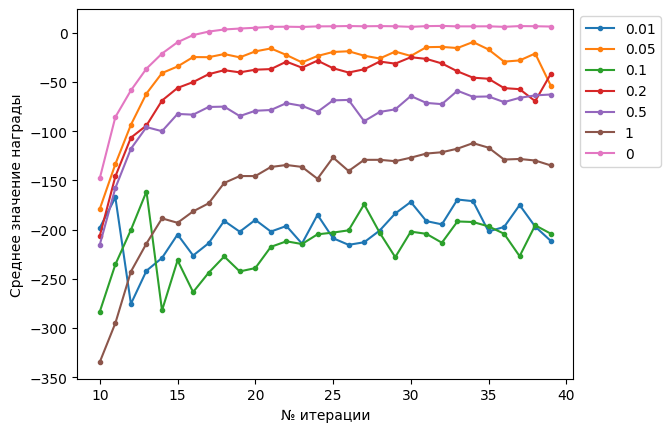

In [10]:
i = 10

for exp, labels in zip(results_2, laplace_smoothing):
    indices = [r["iteration:"] for r in exp["info"][i:]]
    values = [r["mean_total_reward"] for r in exp["info"][i:]]
    plt.plot(indices, values, marker='o', label=labels, markersize=3)

indices = [r["iteration:"] for r in best_initital["info"][i:]]
values = [r["mean_total_reward"] for r in best_initital["info"][i:]]
plt.plot(indices, values, marker='o', label=0, markersize=3)

plt.xlabel('№ итерации')
plt.ylabel('Среднее значение награды')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

# Task 2.2

In [23]:
task_2_df = []
results_2 = []

policy_smoothing = (0.01, 0.05, 0.1, 0.2, 0.5, 0.9)
for p in policy_smoothing:
    agent = CrossEntropyAgent(state_n=STATE_N, action_n=ACTION_N)
    result = agent.train(
    trajectory_n=400,
    iteration_n=40,
    max_length=1000,
    q_param=0.4,
    laplace_smoothing=0.0,
    policy_smoothing=p,
    )
    results_2.append(result)
    task_2_df.append([p, result["info"][-1]["mean_total_reward"], result["info"][-1]["max_total_reward"]])

In [24]:
best_params["policy_smoothing"] = 0.0

In [25]:
best_params["policy_smoothing"] = 0.0
df = pd.DataFrame(task_2_df, columns=["policy_smoothing", "mean_total_reward", "max_total_reward"])
df = pd.concat([best_params.loc[:, ["policy_smoothing", "mean_total_reward", "max_total_reward"]], df]).reset_index(drop=True)
df

,policy_smoothing,mean_total_reward,max_total_reward
0,0.00,6.6275,15
1,0.01,-749.1025,-155
2,0.05,-662.7250,-58
3,0.10,-505.5125,-53
4,0.20,-102.9050,12
5,0.50,6.9575,15
6,0.90,-37.7625,15


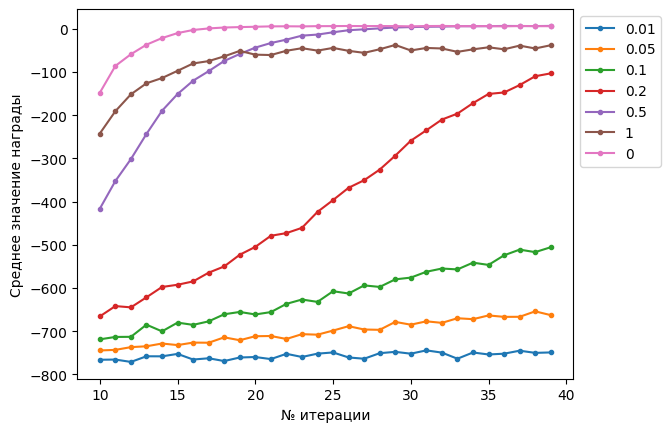

In [26]:
i = 10

for exp, labels in zip(results_2, laplace_smoothing):
    indices = [r["iteration:"] for r in exp["info"][i:]]
    values = [r["mean_total_reward"] for r in exp["info"][i:]]
    plt.plot(indices, values, marker='o', label=labels, markersize=3)

indices = [r["iteration:"] for r in best_initital["info"][i:]]
values = [r["mean_total_reward"] for r in best_initital["info"][i:]]
plt.plot(indices, values, marker='o', label=0, markersize=3)

plt.xlabel('№ итерации')
plt.ylabel('Среднее значение награды')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

# Task # 3

In [ ]:


task_2_df = []
results_2 = []

q_params = (0.2, 0.3, 0.4, 0.5)
for q in q_params:
    agent = CrossEntropyAgent_V2(state_n=STATE_N, action_n=ACTION_N)
    result = agent.train(
    trajectory_n=400,
    iteration_n=40,
    max_length=1000,
    q_param=q,
    laplace_smoothing=0.0,
    policy_smoothing=1,
    )
    results_2.append(result)
    task_2_df.append([q, result["info"][-1]["mean_total_reward"], result["info"][-1]["max_total_reward"]])

In [ ]:
df = pd.DataFrame(task_2_df, columns=["q_param", "mean_total_reward", "max_total_reward"])
df